In [2]:
import numpy as np
import os
import shutil
import matplotlib.pyplot as plt
import json
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 14
from IPython.display import Image
%matplotlib inline

In [3]:
#filename = '04_Hinged_roof_disp.dat'

In [4]:
def readData(filename):
    
    file=open(filename,'r') 
    row = file.readlines()
    
    disp = []
    force = []
    
    state = 0

    for line in row:
        strlist = line.split()
        if 'U2' in strlist:
            state = 1
        elif 'RF2' in strlist:
            state = 2
        elif '289' in strlist:
            if state == 1:
                disp.append(float(strlist[2]))
                state = 0
            if state == 2:
                force.append(float(strlist[2]))
                state = 0
    da = -np.array(disp)
    fa = -np.array(force)
    
    return da, fa


In [5]:
d1, f1 = readData('./L04data/disp40_1000.dat')
d2, f2 = readData('./L04data/disp50_10.dat')
d3, f3 = readData('./L04data/disp60_10.dat')

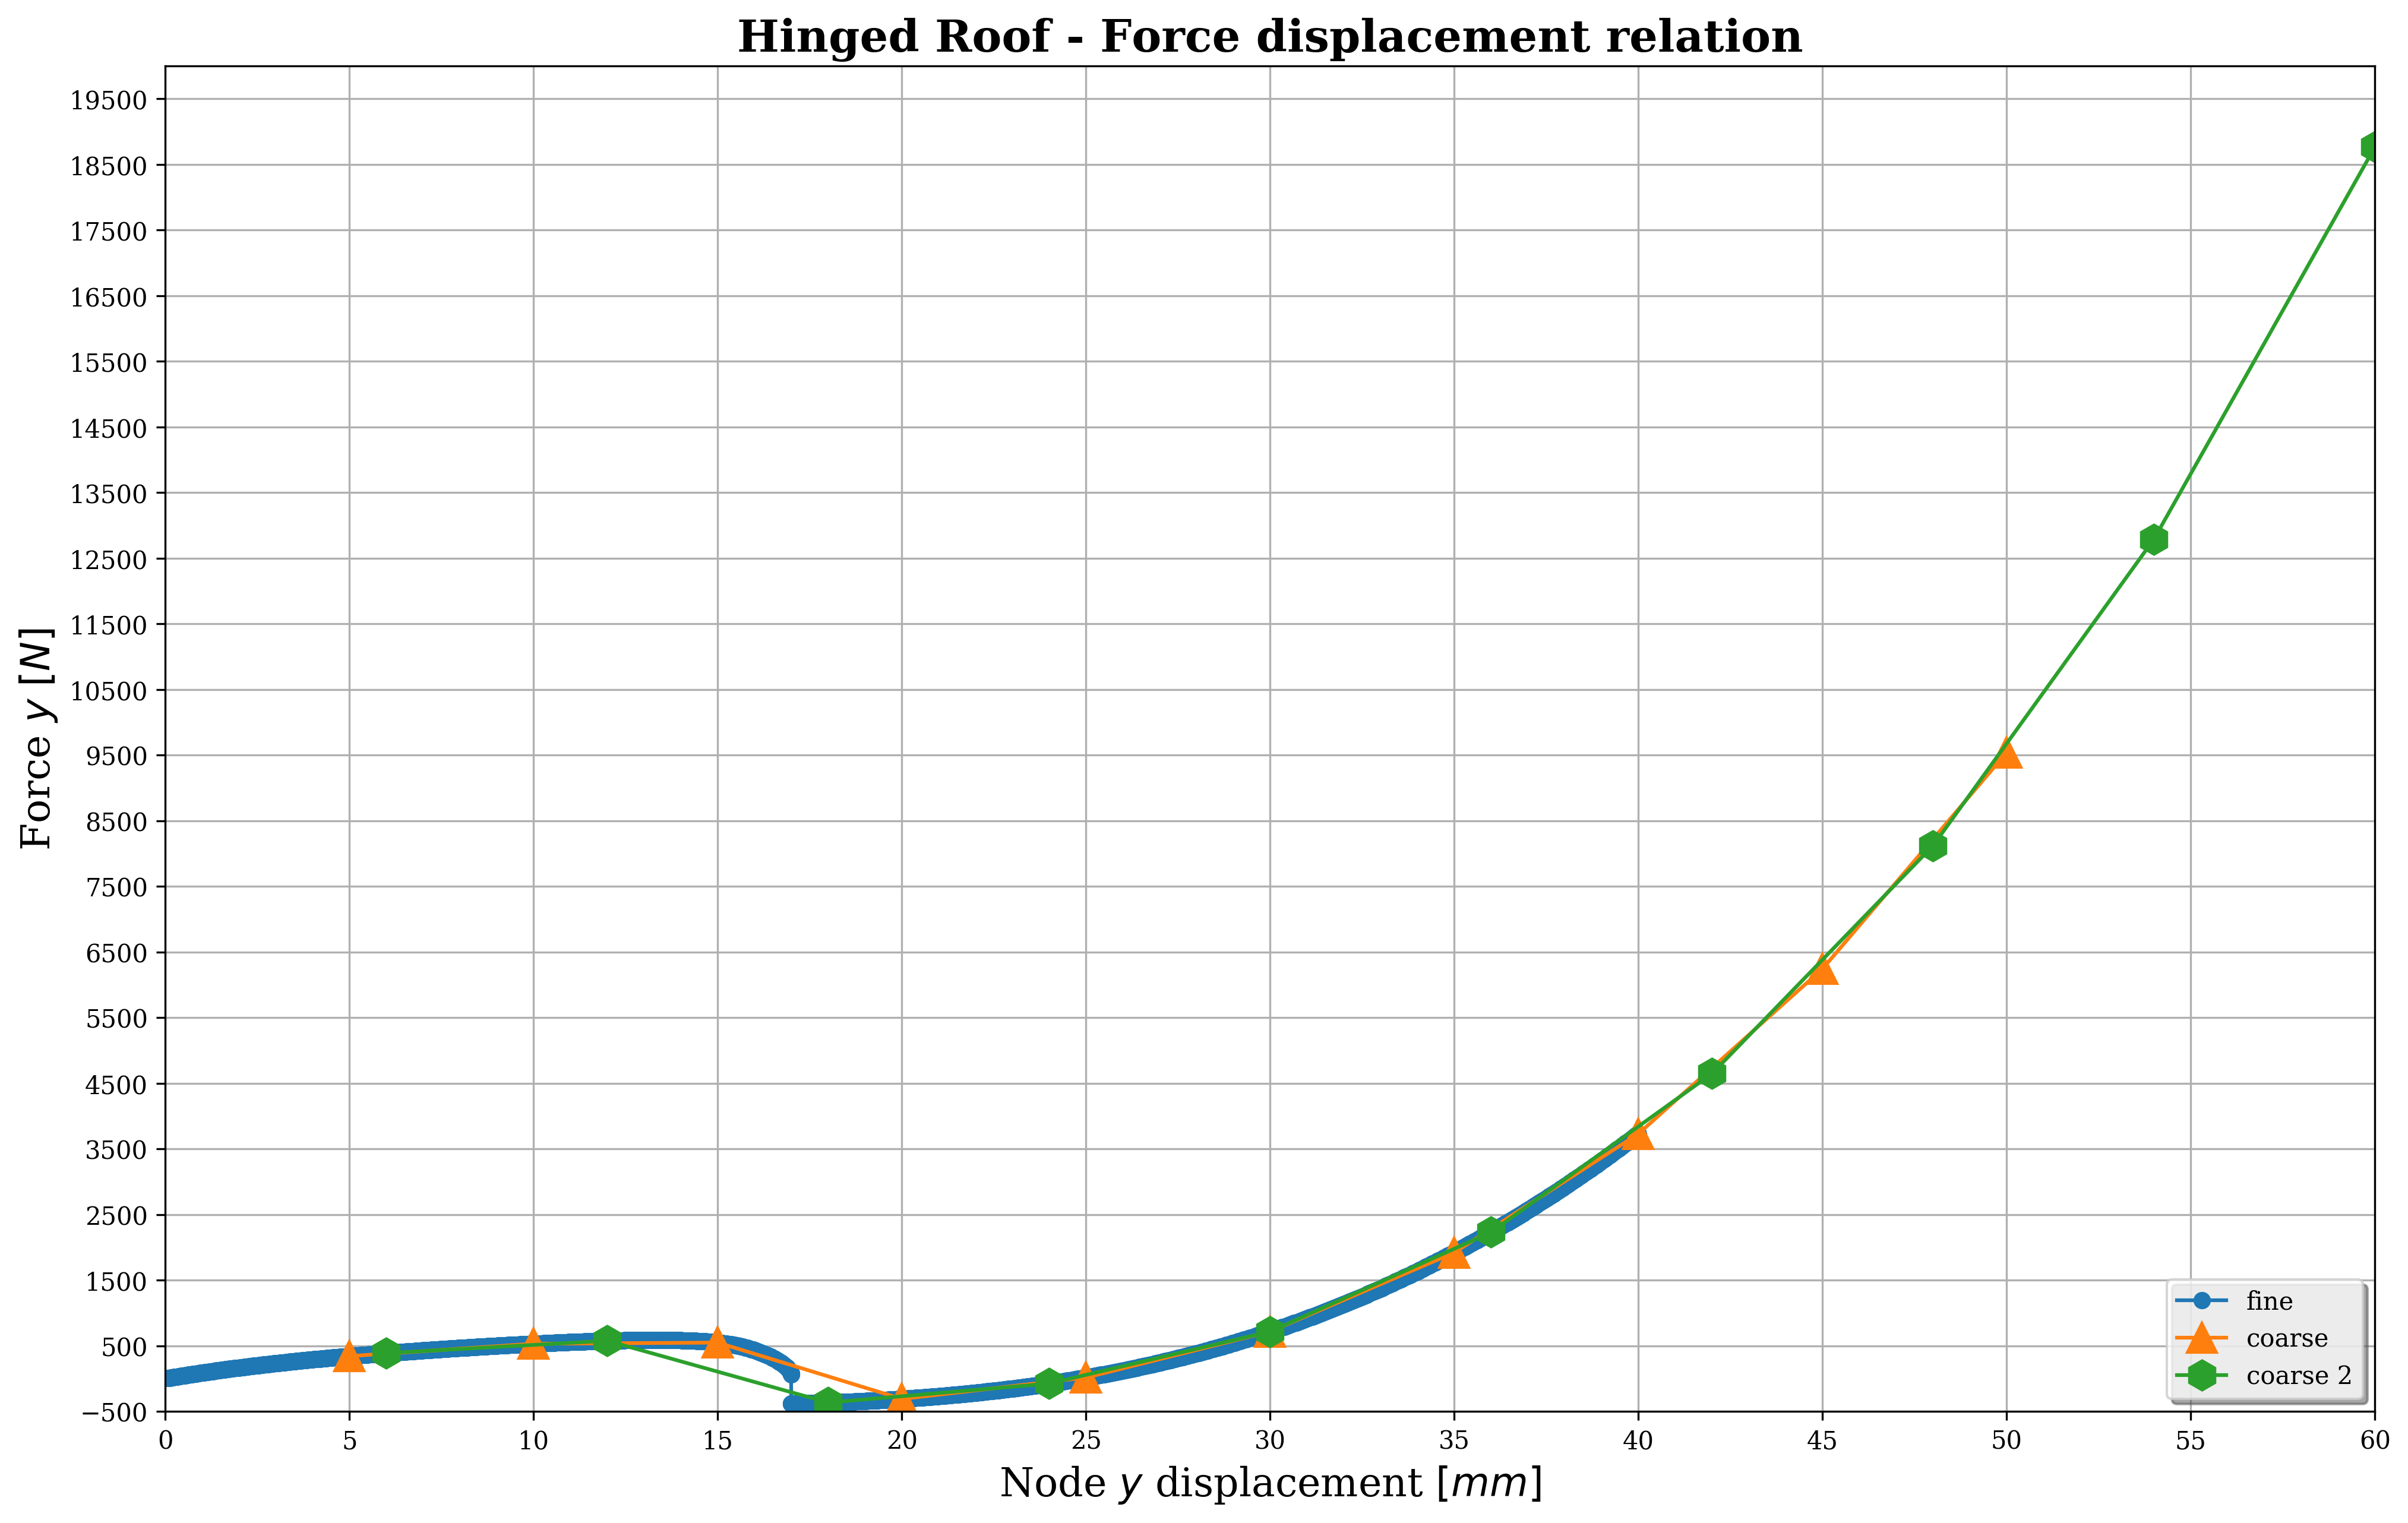

In [10]:
maxD = 60.0
maxF = 20000.
plt.figure(figsize=(16,10), dpi=300)

plt.plot(d1,f1*4, 'o-', label='fine')
plt.plot(d2,f2*4, '^-', ms=12, label='coarse')
plt.plot(d3,f3*4, 'h-', ms=12, label='coarse 2')

plt.xlim([0,maxD])
plt.ylim([-500,maxF])
plt.xticks(np.arange(0.0,maxD+1,5))
plt.yticks(np.arange(-500.0,maxF+.5,1000))
plt.title('Hinged Roof - Force displacement relation',fontsize=18, fontweight='bold')
plt.xlabel('Node $y$ displacement $[mm]$', fontsize=16)
plt.ylabel('Force $y$ $[N]$', fontsize=16)
plt.legend(loc='lower right', shadow=True)
plt.grid()
plt.savefig('Lab04.jpg')

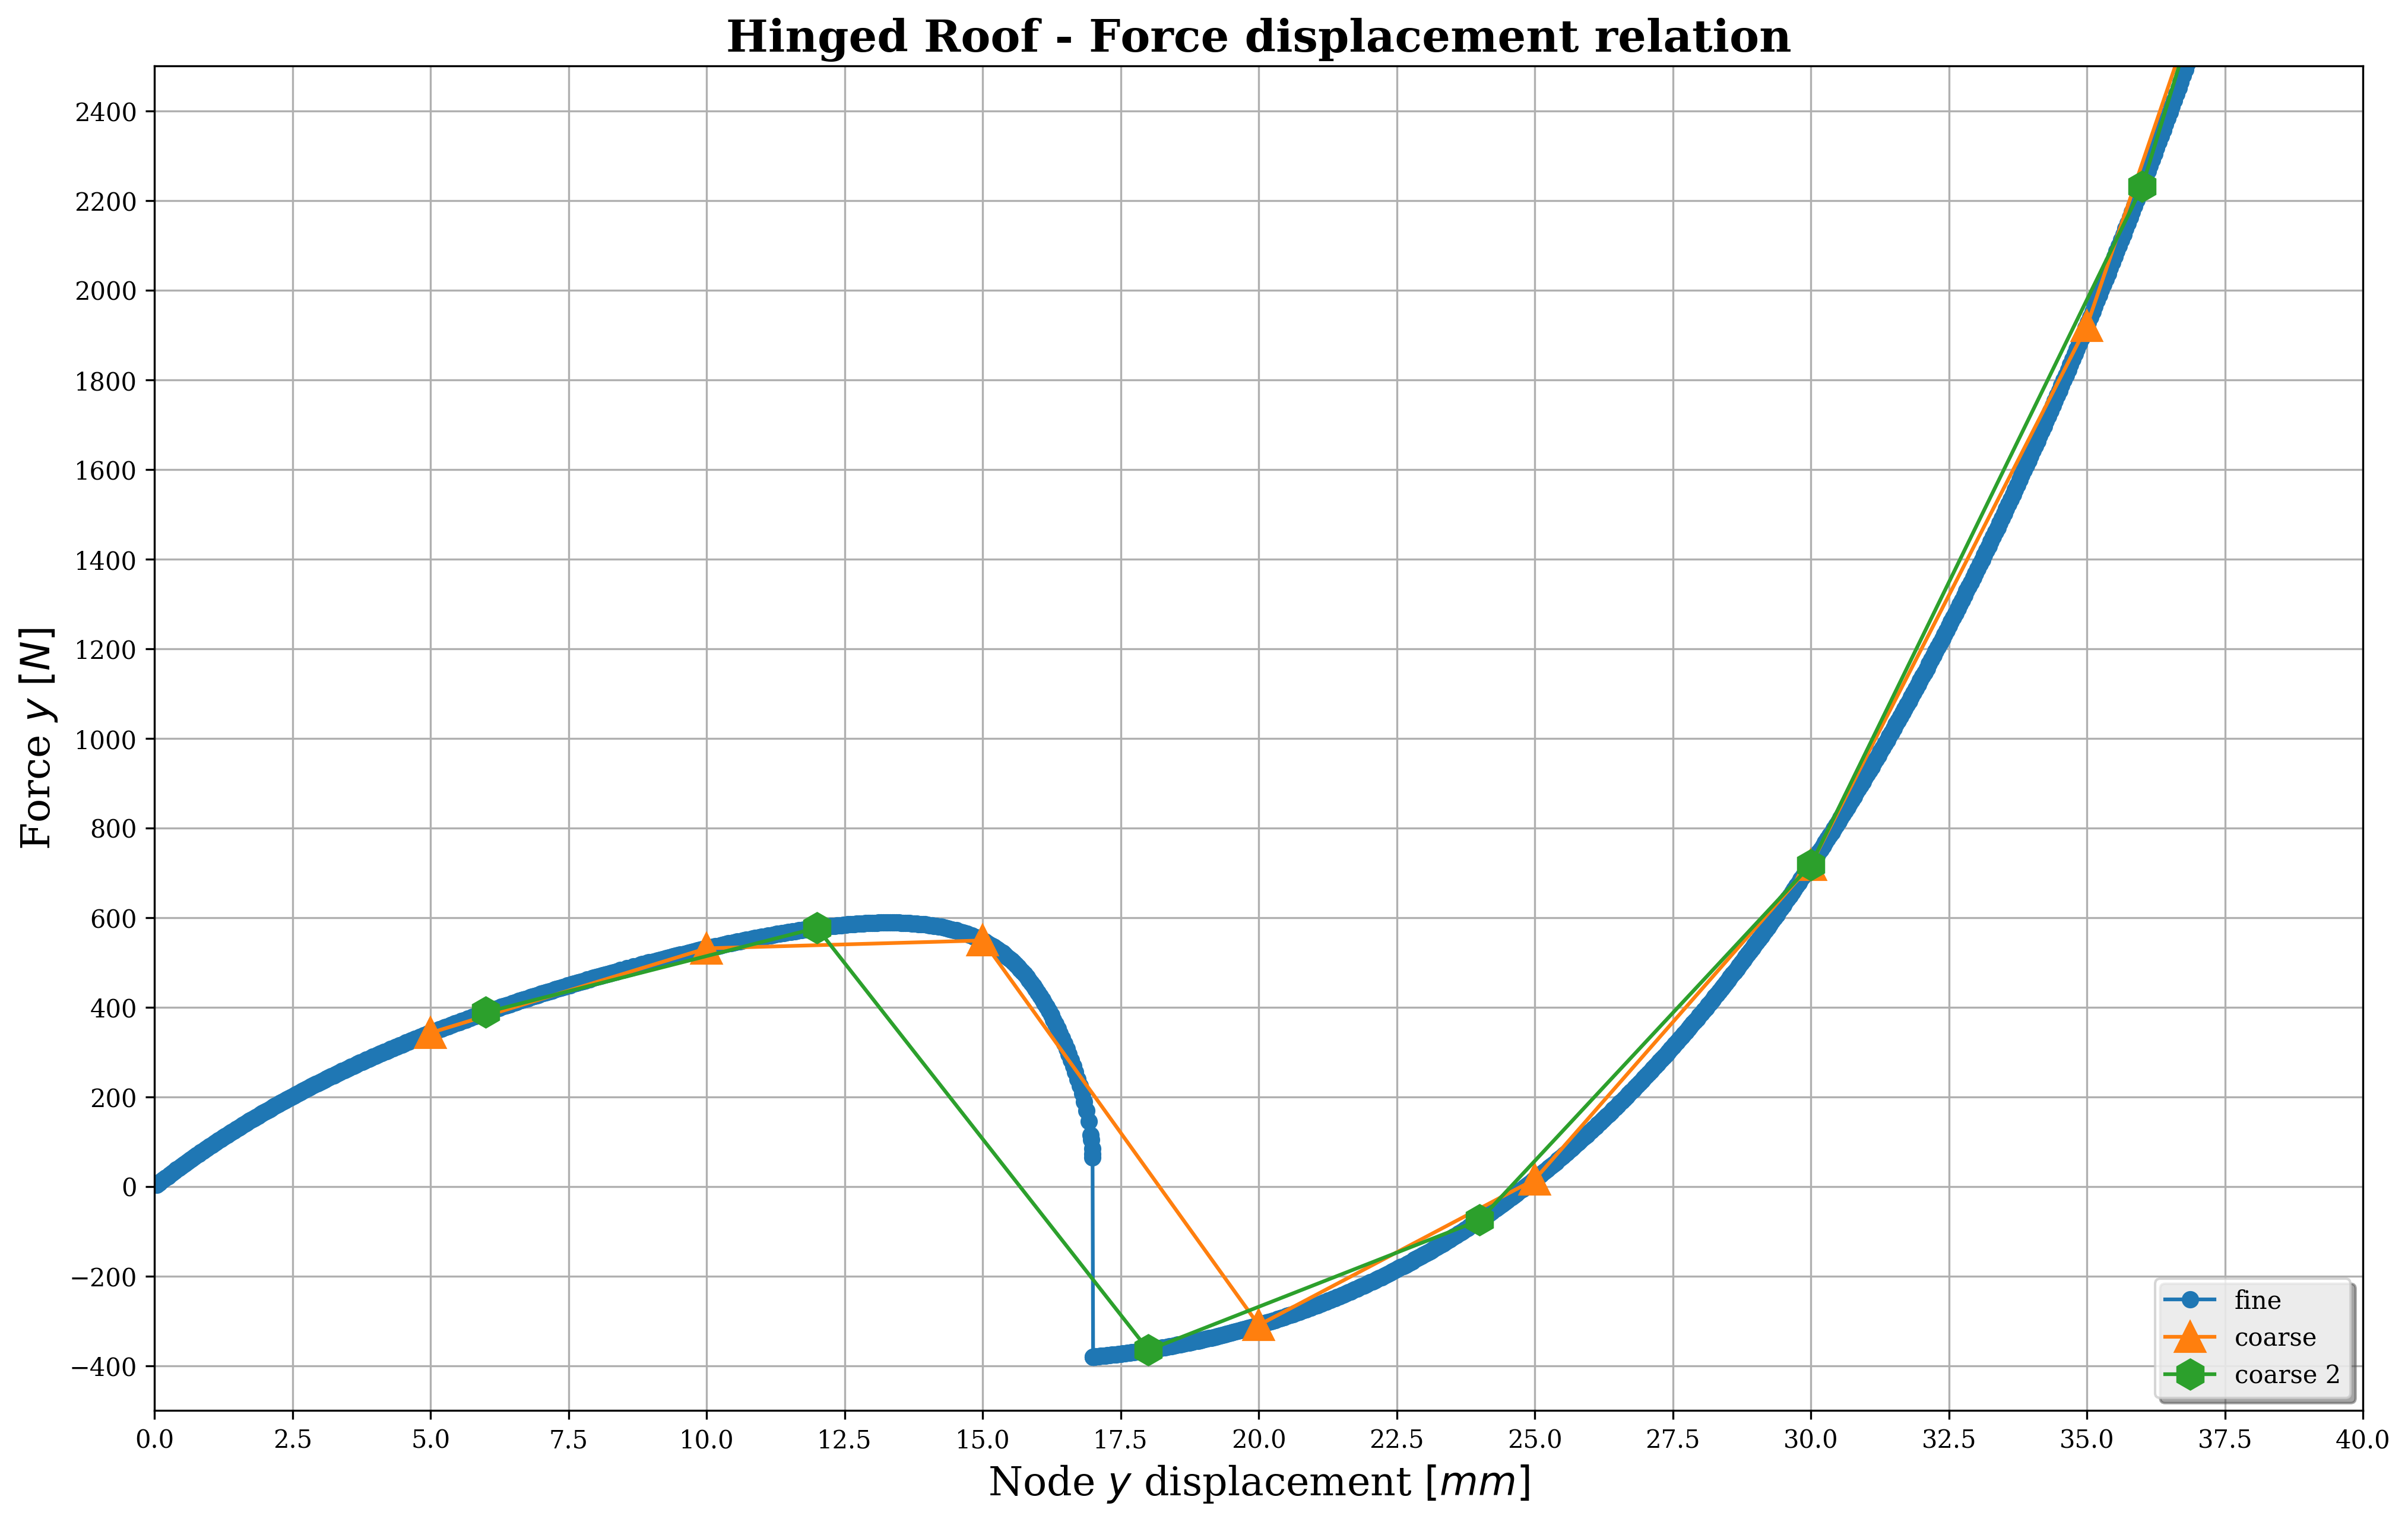

In [13]:
maxD = 40.0
maxF = 2500.
plt.figure(figsize=(16,10), dpi=300)

plt.plot(d1,f1*4, 'o-', label='fine')
plt.plot(d2,f2*4, '^-', ms=12, label='coarse')
plt.plot(d3,f3*4, 'h-', ms=12, label='coarse 2')

plt.xlim([0,maxD])
plt.ylim([-500,maxF])
plt.xticks(np.arange(0.0,maxD+1,2.5))
plt.yticks(np.arange(-400.0,maxF+.5,200))
plt.title('Hinged Roof - Force displacement relation',fontsize=18, fontweight='bold')
plt.xlabel('Node $y$ displacement $[mm]$', fontsize=16)
plt.ylabel('Force $y$ $[N]$', fontsize=16)
plt.legend(loc='lower right', shadow=True)
plt.grid()
plt.savefig('Lab04_det.jpg')